In [1]:
! pip install -q torch torchvision

In [6]:
import torch
from torchvision import models, transforms

In [7]:
mobilenet_v2 = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
mobilenet_v2.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [8]:
preprocess = transforms.Compose([
    transforms.Resize(256),              # resize shortest side to 256 pixels
    transforms.CenterCrop(224),          # crop center region (224x224)
    transforms.ToTensor(),               # convert image → PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])  # normalize using ImageNet stats
])

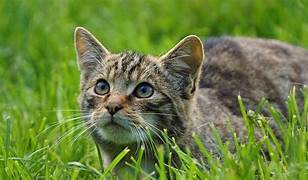

In [18]:
from PIL import Image
cat_img = Image.open('cat.jpg').convert("RGB")
cat_img

In [14]:
cat_img_t = preprocess(cat_img).unsqueeze(0)
cat_img_t.shape

torch.Size([1, 3, 224, 224])

In [15]:
with torch.no_grad():
    output = mobilenet_v2(cat_img_t)

In [19]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [24]:
import urllib

# Download labels (if not available locally)
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
imagenet_classes = [line.strip() for line in urllib.request.urlopen(url)]

# imagenet_classes = ["cat", "dog", "building", "car", "truck"]

# Get top 3
top3_prob, top3_catid = torch.topk(probabilities, 3)

for i in range(top3_prob.size(0)):
    print(f"{i+1}. {imagenet_classes[top3_catid[i]]}: {top3_prob[i].item()*100:.2f}%")

1. b'tiger cat': 46.32%
2. b'tabby': 24.89%
3. b'Egyptian cat': 12.60%


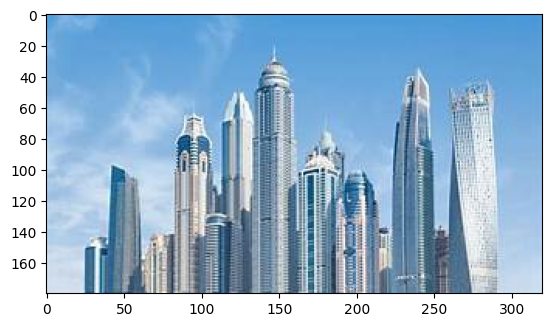

1. b'palace': 36.12%
2. b'mosque': 12.54%
3. b'bell cote': 8.57%


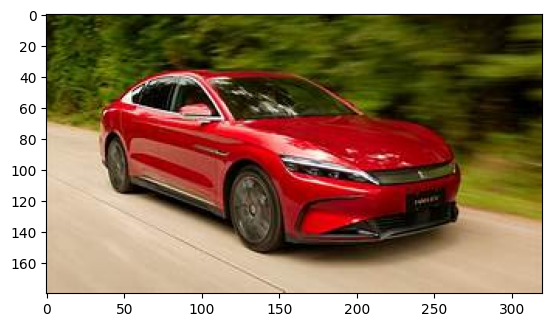

1. b'sports car': 95.13%
2. b'beach wagon': 1.73%
3. b'racer': 1.14%


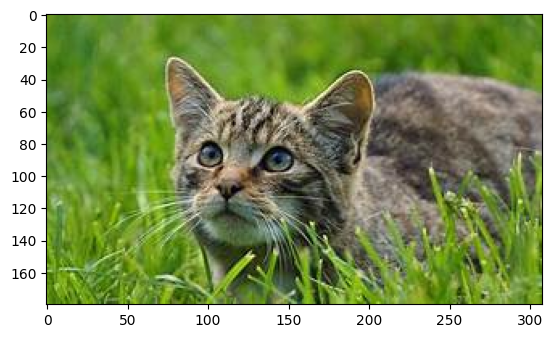

1. b'tiger cat': 46.32%
2. b'tabby': 24.89%
3. b'Egyptian cat': 12.60%


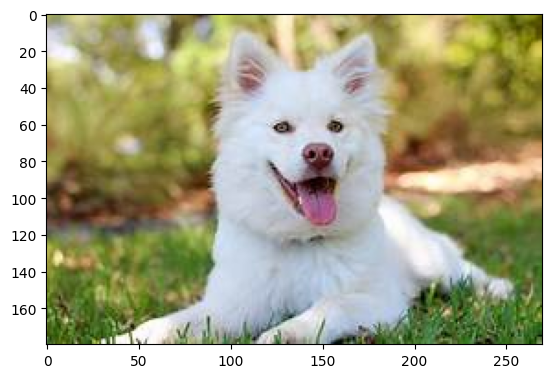

1. b'Samoyed': 53.60%
2. b'keeshond': 8.46%
3. b'Border collie': 6.40%


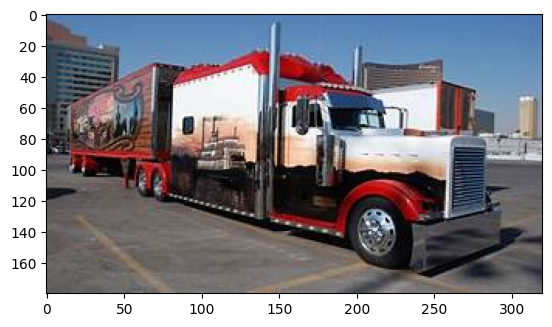

1. b'trailer truck': 52.31%
2. b'tow truck': 22.24%
3. b'moving van': 16.51%


In [28]:
import matplotlib.pyplot as plt

img_path = ["building.jpg", "car.jpg", "cat.jpg", "dog.jpg", "truck.jpg"]
for path in img_path:
  img = Image.open(path).convert("RGB")
  plt.imshow(img)
  plt.show()
  img_t = preprocess(img).unsqueeze(0)
  with torch.no_grad():
    output = mobilenet_v2(img_t)
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
  imagenet_classes = [line.strip() for line in urllib.request.urlopen(url)]

  # imagenet_classes = ["cat", "dog", "building", "car", "truck"]

  # Get top 3
  top3_prob, top3_catid = torch.topk(probabilities, 3)

  for i in range(top3_prob.size(0)):
      print(f"{i+1}. {imagenet_classes[top3_catid[i]]}: {top3_prob[i].item()*100:.2f}%")


In [29]:
len(imagenet_classes)

1000